In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Cleaned.csv")

In [3]:
df.set_index('Unnamed: 0', inplace=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [6]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

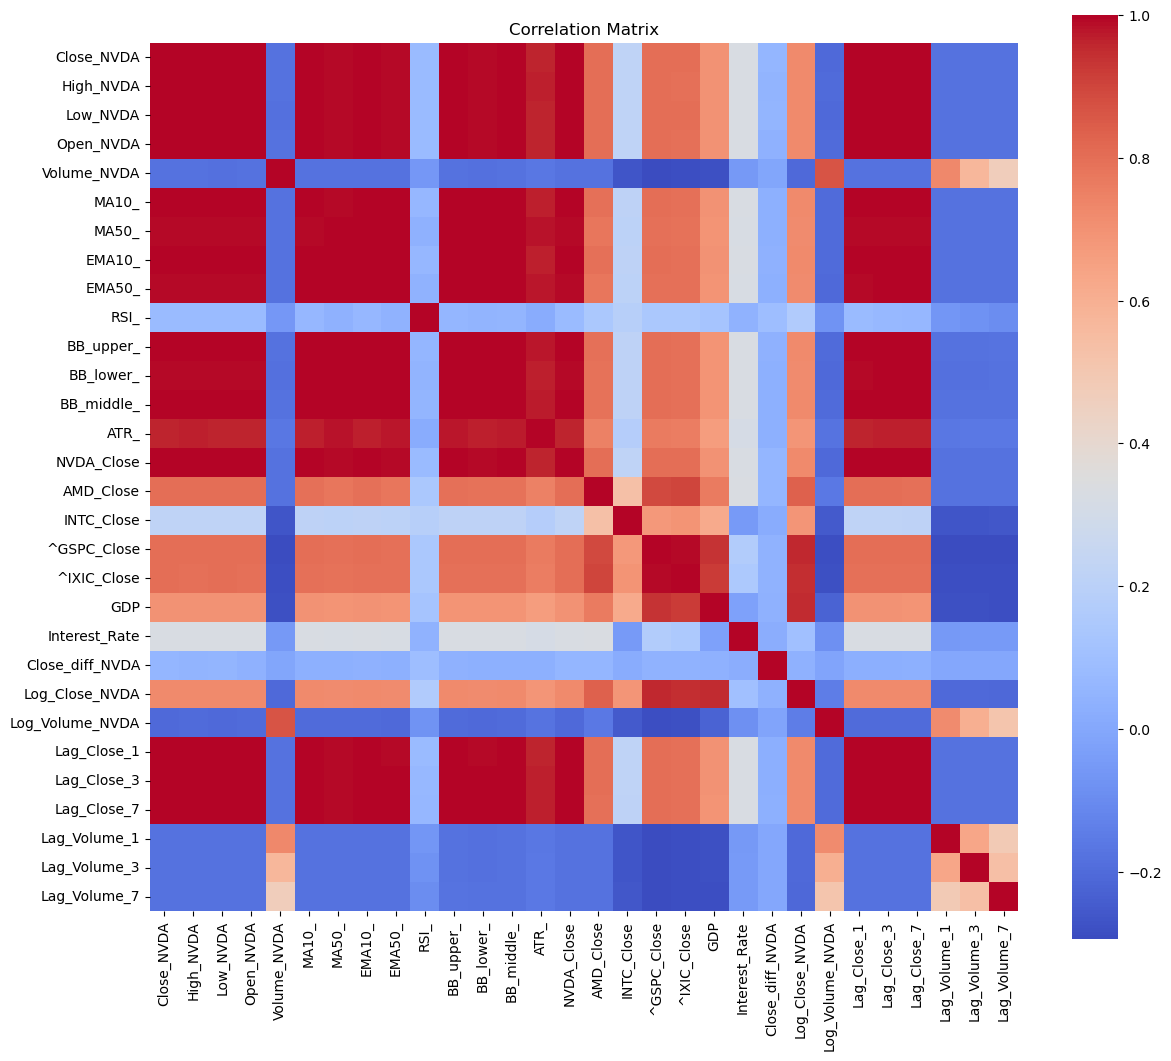

In [7]:
# Plot the correlation matrix

plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Matrix')

plt.show()

In [8]:
# Identify features strongly correlated with `Close_diff_NVDA`
threshold = 0.5  # Define a threshold for strong correlation
strong_correlations = correlation_matrix['Close_NVDA'][

    correlation_matrix['Close_NVDA'].abs() > threshold

].sort_values(ascending=False)

In [9]:
strong_correlations

Close_NVDA        1.000000
NVDA_Close        1.000000
Low_NVDA          0.999836
High_NVDA         0.999790
Open_NVDA         0.999561
Lag_Close_1       0.999540
EMA10_            0.998757
Lag_Close_3       0.998592
MA10_             0.998235
Lag_Close_7       0.996984
BB_upper_         0.996682
BB_middle_        0.996672
BB_lower_         0.994299
EMA50_            0.994224
MA50_             0.991933
ATR_              0.964267
^GSPC_Close       0.801085
AMD_Close         0.799911
^IXIC_Close       0.797922
Log_Close_NVDA    0.724819
GDP               0.697355
Name: Close_NVDA, dtype: float64

In [10]:
# Columns to retain based on analysis
columns_to_retain = [
    'Close_NVDA',
    'Open_NVDA',
    'Lag_Close_1',
    'Lag_Close_3',
    'EMA10_',
    'MA10_',
    'MA50_',
    'GDP',
    'Interest_Rate',
    '^GSPC_Close',
    '^IXIC_Close',
    'AMD_Close',
     'INTC_Close',
]

In [11]:
filtered_df = df[columns_to_retain]

In [12]:
filtered_df

,Close_NVDA,Open_NVDA,Lag_Close_1,Lag_Close_3,EMA10_,MA10_,MA50_,GDP,Interest_Rate,^GSPC_Close,^IXIC_Close,AMD_Close,INTC_Close
Unnamed: 0,,,,,,,,,,,,,
1999-01-22,0.037612,0.040119,0.037612,0.037612,0.037612,0.037289,0.039066,9411.682,4.63,1225.189941,2338.879883,10.781250,18.270565
1999-01-23,0.041552,0.040597,0.037612,0.037612,0.038328,0.037289,0.039066,9411.682,4.63,1233.979980,2369.310059,10.718750,18.518669
1999-01-24,0.041552,0.040597,0.041552,0.037612,0.038328,0.037289,0.039066,9411.682,4.63,1233.979980,2369.310059,10.718750,18.518669
1999-01-25,0.041552,0.040597,0.041552,0.037612,0.038328,0.037289,0.039066,9411.682,4.63,1233.979980,2369.310059,10.718750,18.518669
1999-01-26,0.038328,0.042029,0.041552,0.041552,0.038328,0.037289,0.039066,9411.682,4.63,1252.310059,2433.409912,11.000000,19.413584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,141.720001,142.509995,139.990005,141.220001,138.076883,137.815001,118.404400,29723.864,4.33,6000.359863,19529.949219,116.190002,20.059999
2025-06-07,142.630005,143.190002,141.720001,141.919998,138.904724,138.949002,119.028400,29723.864,4.33,6005.879883,19591.240234,121.730003,20.480000
2025-06-08,142.630005,143.190002,142.630005,139.990005,138.904724,138.949002,119.028400,29723.864,4.33,6005.879883,19591.240234,121.730003,20.480000


In [13]:
filtered_df.to_csv("Cleaned_reduced.csv")